### Bayesian Data Analysis

#### "R" Kernel

### Install Packages

In [ ]:
install.packages('bayeslm', repos='http://cran.rstudio.com/')
install.packages('mvtnorm', repos='http://cran.rstudio.com/')
install.packages('gsubfn', repos='http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Import the libraries

In [ ]:
#library(bayeslm)
library(mvtnorm)
#library(gsubfn)

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”


### Functions

    1. Preprocessing the data frame for a given country
    2. For Gaussian Q-Q plot
    3. For Laplace Q-Q plot
    4. For Posterior summary
    5. For trace plot(If argument "density_plot"==TRUE then it also plots the posterior distribution)
    6. For model fitting using Metropolis-Hasting(It uses some required functions which are also given)

    For a specific country we call the functions as required and get our desired result.

### Procedure

    1. First we read the data and preprocess for a particular country
    2. We then Visualize the response variable over time which gives us a idea about the data
    3. We then choose the predictors
    4. We run OLS analysis of linear regression and interpret 
    5. We check for nomality of residuals - Shapiro-Wilk test and Q-Q plot
    6. If not normal we check whether residuals follow laplace distribution - Q-Q plot
    7. Now we choose prior distribution of the parameters
    8. If not a closed form solution for posterior, we use Metropolis-Hastings to get the posterior
    9. We then check the trace plot and decide the burn-in period
    10. Considering Burn-in period we find the posterior summary, trace plot
    11. We interpret our result based on the posterior summary

In [ ]:
## To supress warnings
options(warn=-1)

### Read the data

In [ ]:
rm(list=ls())
data<-read.csv(file='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',head=TRUE)

In [ ]:
head(data,4)

,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,⋯,X4.25.20,X4.26.20,X4.27.20,X4.28.20,X4.29.20,X4.30.20,X5.1.20,X5.2.20,X5.3.20,X5.4.20
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,⋯,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,⋯,712,726,736,750,766,773,782,789,795,803
3,,Algeria,28.0339,1.6596,0,0,0,0,0,0,⋯,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
4,,Andorra,42.5063,1.5218,0,0,0,0,0,0,⋯,738,738,743,743,743,745,745,747,748,750


In [ ]:
## Column names
colnames(data)

[1] "Province.State" "Country.Region" "Lat"            "Long"          
  [5] "X1.22.20"       "X1.23.20"       "X1.24.20"       "X1.25.20"      
  [9] "X1.26.20"       "X1.27.20"       "X1.28.20"       "X1.29.20"      
 [13] "X1.30.20"       "X1.31.20"       "X2.1.20"        "X2.2.20"       
 [17] "X2.3.20"        "X2.4.20"        "X2.5.20"        "X2.6.20"       
 [21] "X2.7.20"        "X2.8.20"        "X2.9.20"        "X2.10.20"      
 [25] "X2.11.20"       "X2.12.20"       "X2.13.20"       "X2.14.20"      
 [29] "X2.15.20"       "X2.16.20"       "X2.17.20"       "X2.18.20"      
 [33] "X2.19.20"       "X2.20.20"       "X2.21.20"       "X2.22.20"      
 [37] "X2.23.20"       "X2.24.20"       "X2.25.20"       "X2.26.20"      
 [41] "X2.27.20"       "X2.28.20"       "X2.29.20"       "X3.1.20"       
 [45] "X3.2.20"        "X3.3.20"        "X3.4.20"        "X3.5.20"       
 [49] "X3.6.20"        "X3.7.20"        "X3.8.20"        "X3.9.20"       
 [53] "X3.10.20"       "X3.11.20"       "X3.12.20"       "X3.13.20"      
 [57] "X3.14.20"       "X3.15.20"       "X3.16.20"       "X3.17.20"      
 [61] "X3.18.20"       "X3.19.20"       "X3.20.20"       "X3.21.20"      
 [65] "X3.22.20"       "X3.23.20"       "X3.24.20"       "X3.25.20"      
 [69] "X3.26.20"       "X3.27.20"       "X3.28.20"       "X3.29.20"      
 [73] "X3.30.20"       "X3.31.20"       "X4.1.20"        "X4.2.20"       
 [77] "X4.3.20"        "X4.4.20"        "X4.5.20"        "X4.6.20"       
 [81] "X4.7.20"        "X4.8.20"        "X4.9.20"        "X4.10.20"      
 [85] "X4.11.20"       "X4.12.20"       "X4.13.20"       "X4.14.20"      
 [89] "X4.15.20"       "X4.16.20"       "X4.17.20"       "X4.18.20"      
 [93] "X4.19.20"       "X4.20.20"       "X4.21.20"       "X4.22.20"      
 [97] "X4.23.20"       "X4.24.20"       "X4.25.20"       "X4.26.20"      
[101] "X4.27.20"       "X4.28.20"       "X4.29.20"       "X4.30.20"      
[105] "X5.1.20"        "X5.2.20"        "X5.3.20"        "X5.4.20"

In [ ]:
## dates handling
dts1<-dts<-colnames(data)[-c(1:4)]
for(j in 1:length(dts))dts1[j]<-strsplit(dts[j],"X")[[1]][2] 
dats<-as.Date(dts1,format = "%m.%d.%y") 

### Function for preprocessing work on data frame
### For a specific country

In [ ]:
preprocessed_dataframe = function(country_name){
  country_data<-data[data$Country.Region==country_name,]
  country_data1<-cbind.data.frame(Date=dats,Cases=t(country_data[-c(1:4)]))
  country_incid<-diff(country_data1[,2])
  n<-length(country_incid)  
  #head(India_data)

  country_data2<-cbind.data.frame(Dates=dats[2:length(dats)],country_incid=country_incid,Cases=country_data1[,2][2:(n+1)])
  colnames(country_data2)<-c("Dates","Incidence","Total_Confirmed_Cases")
  return(country_data2)
  }

### India Data

In [ ]:
India_data = preprocessed_dataframe("India")

India_data<-subset(India_data,Dates>="2020-03-04")
India_data<-subset(India_data,Dates<="2020-05-01")

India_data$Time<-0:(nrow(India_data)-1)
India_data$lock_down<-0
India_data$lock_down[India_data$Dates>="2020-03-25"]<-1
India_data$ln_rt[2:nrow(India_data)]<-diff(log(India_data$Total_Confirmed_Cases))
India_data <- na.omit(India_data)

In [ ]:
head(India_data)

,Dates,Incidence,Total_Confirmed_Cases,Time,lock_down,ln_rt
,<date>,<int>,<int>,<int>,<dbl>,<dbl>
43,2020-03-05,2,30,1,0,0.06899287
44,2020-03-06,1,31,2,0,0.03278982
45,2020-03-07,3,34,3,0,0.09237332
46,2020-03-08,5,39,4,0,0.13720112
47,2020-03-09,4,43,5,0,0.09763847
48,2020-03-10,13,56,6,0,0.26415158


Visualize

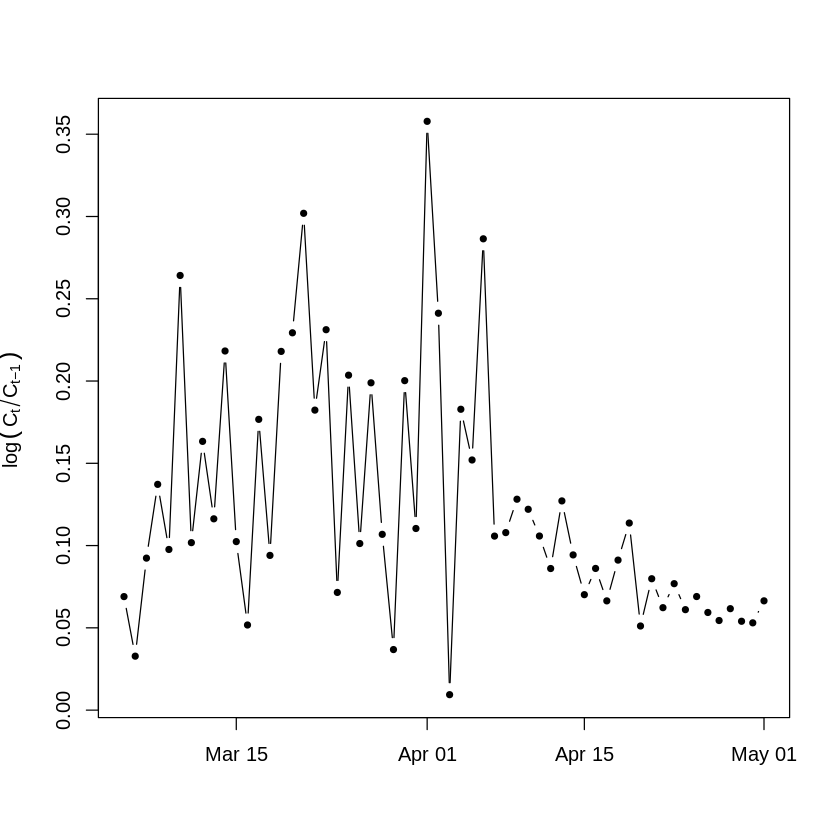

In [ ]:
plot(India_data$Dates,India_data$ln_rt,type="b",pch=20,ylab = expression(log(C[t]/C[t-1])),xlab="")

This plot indicates from 7th-April, 2020 (exactly 14 days from the lockdown starts - something has happened.)


### Fit linear model

In [ ]:
fit_lm<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=India_data)
summary(fit_lm)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = India_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139127 -0.036182 -0.009149  0.026402  0.208187 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  8.930e-02  3.066e-02   2.913  0.00520 **
Time         7.435e-03  3.115e-03   2.387  0.02054 * 
I(Time^2)   -1.378e-04  4.166e-05  -3.307  0.00168 **
lock_down   -3.983e-02  3.870e-02  -1.029  0.30801   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06466 on 54 degrees of freedom
Multiple R-squared:  0.2933,	Adjusted R-squared:  0.254 
F-statistic:  7.47 on 3 and 54 DF,  p-value: 0.0002849


From the p-values we can conclude that Time and Time^2 has significant effect on response variable(log ratios) but p-value corresponding to lockdown variable is greater than 0.05 which means that lockdown doesn't have significant effect on response variable. From the R-square value we can also conclude that the fitting is not good. This analysis indicates that lockdown may reduce the disease progression - but it is not statistically significant.

### Check Normality of the residuals

### Function for Gaussian Q-Q plot

In [ ]:
Q_Q_plot_gaussian = function(model){
  qqnorm(model$residuals
        ,cex=0.3
        ,pch=20
        ,xlim=c(-4,4)
        ,ylim=c(-4,4)
        ,xlab="Log-ratio of total confirmed cases with fitted Gaussian distribution"
        ,ylab="observed residual"
        ,main="Gaussian Q-Q Plot")
  abline(a=0,b=1,col="blue")
  grid(col="red")
  }

### Function for Laplace Q-Q plot

In [ ]:
## density of Laplace distribution 
dlaplace<-function(x,mu,lambda){
  exp(-abs(x-mu)/lambda)/(2*lambda)
}
## The negative log-likelihood function
neg_log_likelihood<-function(data,para){
  mu<-para[1]
  lambda<-(para[2])
  f<-dlaplace(x=data
              ,mu=mu
              ,lambda=lambda)
  return(-sum(log(f)))
}

## The following function simulate from 
## the fitted Laplace distribution
rlaplace<-function(n,mu,lmbda){
  # n : sample size
  # mu: location parameter
  # lambda : scale parameter
  u<-runif(n,-0.5,0.5)
  sgn<-rep(NA,n)
  for(i in 1:n){
    if(u[i]<0) sgn[i]<--1
    if(u[i]>0) sgn[i]<-1
    if(u[i]==0) sgn[i]<-0
  }
  r<-mu-lmbda*sgn*log(1-2*abs(u))
  return(r)
}

In [ ]:
## Laplace Q-Q plot function
Q_Q_plot_laplace = function(model,sim_size =1000) {
  ## initial parameters
  para.init<-c(0,1) 
  
  e<-summary(model)$residual

  mle<-optim(para.init
           ,neg_log_likelihood
           ,data=e)

  ## simulate the result
  set.seed(1)
  r.sim<-rlaplace(n=sim_size
                ,mu=mle$par[1]
                ,lmbda=mle$par[2])

  qqplot(r.sim,e
        ,xlim=c(-4,4)
        ,ylim=c(-4,4)
        ,cex=0.5
        ,pch=20
        ,xlab="Log ratio of total confirmed cases with fitted Laplace distribution"
        ,ylab="observed residual"
        ,main="Laplace Q-Q Plot")
  abline(a=0,b=1,col="blue")
  grid(col="red")
  }

### Shapiro-Wilk Normality test

In [ ]:
shapiro.test(fit_lm$residuals)


	Shapiro-Wilk normality test

data:  fit_lm$residuals
W = 0.95113, p-value = 0.0205


### Q-Q plots

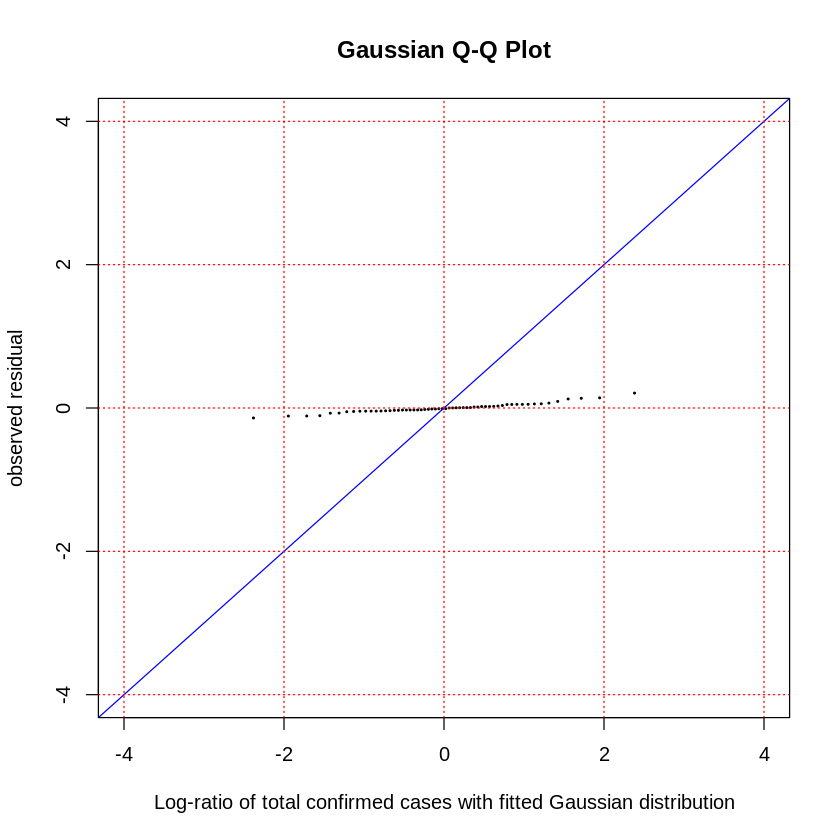

In [ ]:
Q_Q_plot_gaussian(fit_lm)

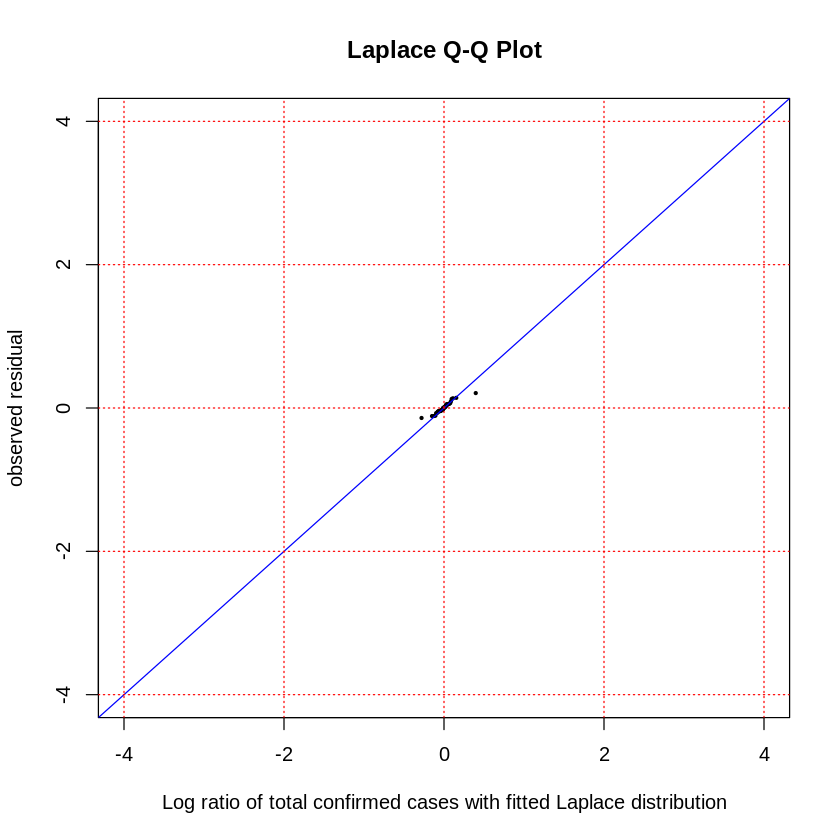

In [ ]:
Q_Q_plot_laplace(fit_lm)

From Shapiro-wilk test and looking at the Gaussian Q-Q plot, it is clear that the error doesn't follow normal distribution. From the Laplacian Q-Q plot we can say that errors follow laplace distribution.

### Implementation

In [ ]:
return_variables = function(processed_dataframe){
  y = processed_dataframe$ln_rt
  x1 = processed_dataframe$Time
  x2 = (processed_dataframe$Time)**2
  x3 = processed_dataframe$lock_down
  return(list(y,x1,x2,x3))
}

### Conjugate prior distribution - Normal-inverse-gamma




In [ ]:
run_for_gaussian_residual = function(y,x,sim_size= 1000, burn_in= 100){
  n = length(y)
  Intercept<-rep(1,n)
  f<-cbind(Intercept, x)

  ## parameters of prior distribution
  nms<-c("alpha","beta_1","beta_2","beta_3")
  k<-length(nms)
  beta_0<-rep(0,k)
  Lambda_0<-diag(1,nrow=length(beta_0))
  a_0<-0.1
  b_0<-0.01

  ## parameters of posterior distribution
  Lambda_pi<-t(f)%*%f+Lambda_0
  Lambda_pi_inv<-solve(Lambda_pi)
  beta_pi<-Lambda_pi_inv%*%(t(f)%*%y
                            +Lambda_0%*%beta_0)

  rownames(beta_pi)<-nms
  a_pi<-a_0+n/2
  err <-(y-f%*%beta_pi)
  b_pi<-b_0+0.5*t(err)%*%(err)

  ## Simulate from Posterior distribution
  set.seed(1)
  N.sim<-sim_size
  burnin<-burn_in
  sigma<-rep(NA,N.sim)
  beta.draws <- matrix(NA
                      , nrow=N.sim
                      , ncol=k)
  colnames(beta.draws)<-nms

  for(i in 1:(N.sim+burnin)){
    sigma_2_star<-1/rgamma(1,a_pi,b_pi)
    S <- sigma_2_star*Lambda_pi_inv
    beta_star<-rmvnorm(1,mean = beta_pi
                      ,sigma = S)
    if(i >burnin){
      sigma[i-burnin]<-sqrt(sigma_2_star)
      beta.draws[i-burnin,]<-beta_star
    }
  }
  theta<-cbind(beta.draws,sigma)
  return(theta)
}

Here we don't need this function as the residuals don't follow normal distribution.

### Function for Posterior Summary

In [ ]:
posterior_summary= function(theta){
  post_median<-apply(theta,2,median)
  post_mean <- apply(theta,2,mean)
  post_sd   <- apply(theta,2,sd)
  post_band <- apply(theta,2,quantile
                    ,prob=c(0.025,0.975))
  post_sumry<-rbind( post_median     
                    ,post_mean
                    ,post_sd
                    ,post_band)
  rownames(post_sumry)<-c("median"
                          ,"mean"
                          ,"sd"
                          ,"2.5%"
                          ,"97.5%")
  return(round(post_sumry,digits = 4))
  }

### Function to plot (For different parameters)

In [ ]:
trace_plot = function(theta, density_plot = FALSE){
  pars = colnames(theta)
  n = ncol(theta)
  if (density_plot == TRUE){
  par(mfrow=c(n,2))
  } else{
  par(mfrow=c(ceiling(n/2),2)) 
  }
  for(i in 1:n){
    s = colnames(theta)[i]
    plot(ts(theta[,s])
        ,ylab = s)
    if (density_plot == TRUE){
      plot(density(theta[,s])
          ,main = ""
          ,xlab = s)
    }
    }
  }

### Response and Predictors

In [ ]:
out_ind = return_variables(India_data)
y_ind = unlist(out_ind[1]); x1_ind = unlist(out_ind[2]); x2_ind = unlist(out_ind[3]); x3_ind = unlist(out_ind[4])
x_ind = cbind(x1_ind,x2_ind,x3_ind)

In [ ]:
## For conjugate prior - Normal-Inverse Gamma we run the following
# theta_ind = run_for_gaussian_residual(y_ind,x_ind,sim_size = 2000, burn_in=0)
# posterior_summary(theta_ind)
#trace_plot(as.data.frame(theta)[1])
# trace_plot(theta_ind, density_plot=TRUE)

### Prior & Posterior Distribution

In [ ]:
## Log-Likelihood
log_likelihood <- function(param,y,x){
  a = param[1]
  b1 = param[2]
  b2 = param[3]
  b3 = param[4]
  lambda = param[5]
  pred = a + b1*x[,1] + b2*x[,2] + b3*x[,3]  
  likelihoods = -log(2*lambda)-abs(y-pred)/lambda
  sumll = sum(likelihoods)
  return(sumll)   
}

## Log-Prior
log_prior <- function(param,x){
  a = param[1]
  b1 = param[2]
  b2 = param[3]
  b3 = param[4]
  lambda = param[5]
  a_prior = dcauchy(a,0,1,log = T) 
  b1_prior = dcauchy(b1,0,1,log = T) 
  b2_prior = dcauchy(b2,0,1,log = T) 
  b3_prior = dcauchy(b3,0,1,log = T) 

  scale_prior = dgamma(lambda
                       ,1,1
                       ,log = T)
  
  return(a_prior+b1_prior+b2_prior+b3_prior+scale_prior)
}

## Log-Posterior
log_posterior <- function(param,y,x){
  like <- log_likelihood(param=param
                         ,y,x)
  prior <- log_prior(param=param,x)
  post  <- like + prior
  return ( post )
}

### Model Fitting with Metropolis-Hastings

proposalfunction <- function(param,x){
  X=cbind(rep(1,length(x[,1])),x)
  S=param[5]*solve(t(X)%*%X)
  prop<-c(rmvnorm(1
                  ,mean = param[1:4]
                  ,sigma = S)
          ,rgamma(1,param[5]*5,5))
  return(prop)
}

run_metropolis <- function(startvalue, N.sim, burnin, y,x){
  set.seed(1)
  iterations = N.sim + burnin
  chain = array(dim = c(iterations+1,5))
  chain[1,] = startvalue
  for (i in 1:iterations){c("alpha","beta_1","beta_2","beta_3","lambda")
    proposal = proposalfunction(chain[i,],x)
    
    probab = exp(log_posterior(param=proposal
                               ,y,x) 
                 - log_posterior(param=chain[i,]
                                 ,y,x))
    
    if (runif(1) < probab){
      chain[i+1,] = proposal
    }else{
      chain[i+1,] = chain[i,]
    }
  }
  colnames(chain)<-c("alpha","beta_1","beta_2","beta_3","lambda")
  chain=chain[(burnin+1):nrow(chain),]

  return(chain)
}

### Without Burn-in period

In [ ]:
chain_ind = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim= 50000
                       ,burnin=0, y_ind,x_ind) 

posterior_summary(chain_ind)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.0726,0.0060,-0.0001,-0.0965,0.0546
mean,0.5438,-5.3641,0.3361,-5.3412,60.9109
sd,4.9916,8.5262,0.4437,22.7610,80.8644
2.5%,-4.3430,-26.0737,-0.0002,-83.4319,0.0394
97.5%,12.9805,0.0277,1.0722,3.9274,226.2213


### Trace Plot
### To decide no of burn-in iterations



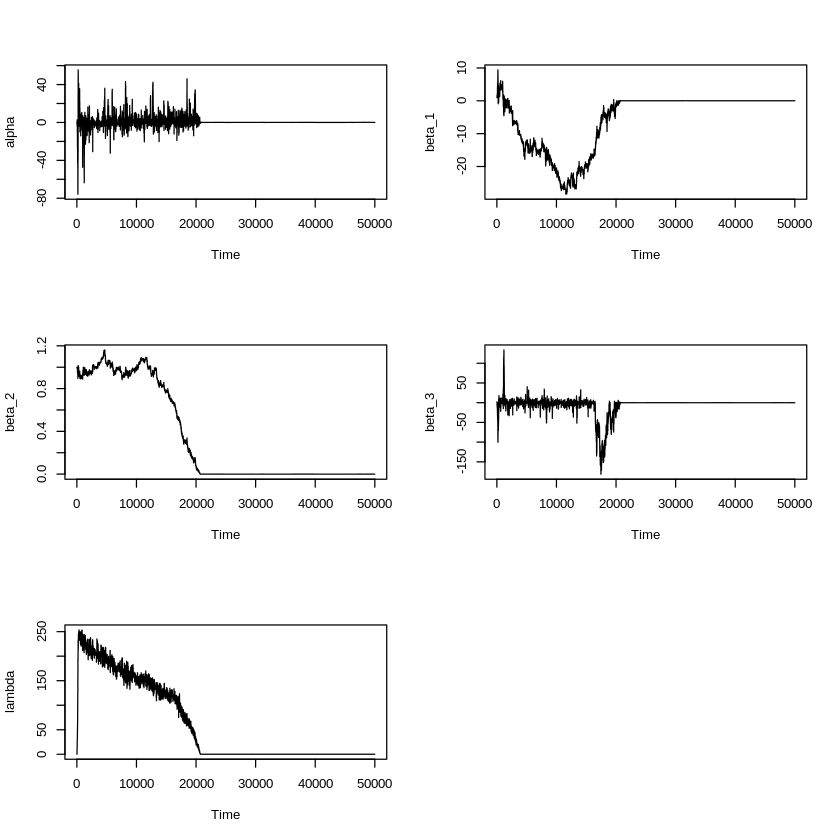

In [ ]:
trace_plot(as.data.frame(chain_ind)[1:5])

The trace plot shows the sampled values of a parameter over time.This plot helps you to judge how quickly the MCMC procedure converges in distribution—that is, how quickly it forgets its starting values. In this case, it looks like there was a burn-in of about 21000 iterations, after which the MCMC sampler seems to mix well. So we now plot taking a burn-in of about 21000 iterations and conclude our result from the summary statistics of the posterior.

### Considering Burn-in period

In [ ]:
chain_ind = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim=50000
                       ,burnin=22000, y_ind,x_ind)

## Posterior summary
posterior_summary(chain_ind)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.0728,0.0086,-1e-04,-0.1089,0.0472
mean,0.0738,0.0088,-1e-04,-0.0946,0.0469
sd,0.0230,0.0024,0e+00,0.0307,0.0059
2.5%,0.0369,0.0034,-2e-04,-0.1349,0.0393
97.5%,0.1401,0.0139,-1e-04,-0.0113,0.0633


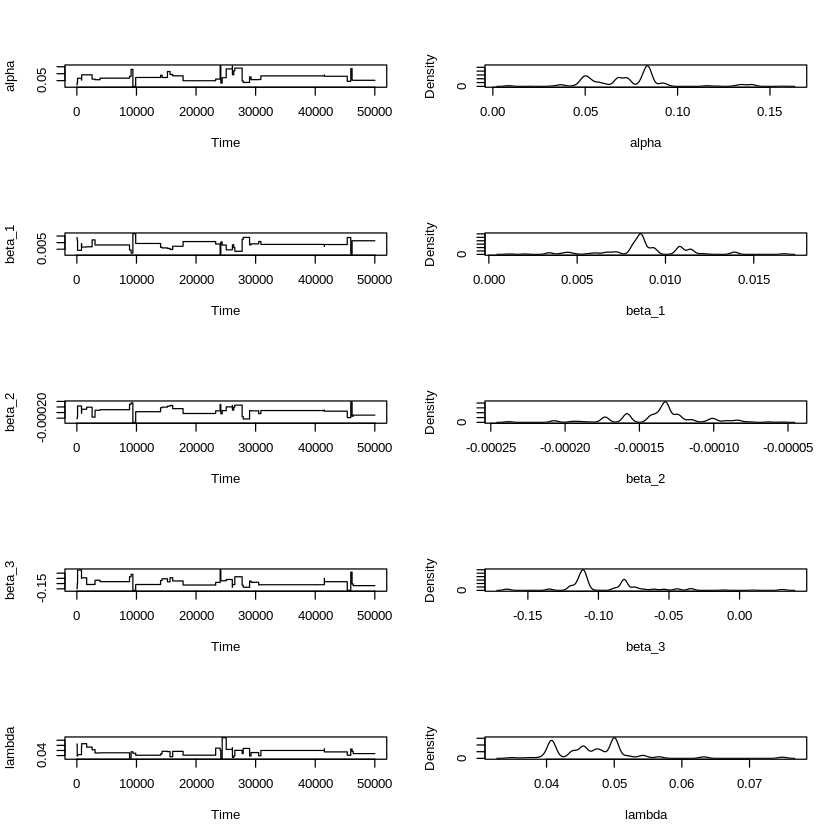

In [ ]:
## Trace plot and plot of the distributions
trace_plot(chain_ind, density_plot= TRUE)

From the summary statistics of posterior of the parameters we can conclude whether a variable has a significant effect on the response variable or not.
Here we can take the mean of the parameters as our estimates and can have a regression line. Based on the 95% credible interval from the summary statistics,we can say that all the x's(Time, Time^2, lockdown) have effect on y as the the symmetric posterior quantile based credible intervals for the co-efficients exclude zero.
Though from the summary it is clear that the effect of x's on y is not much. Co-efficient corresponding to lockdown comes out to be negative which does mean that when the lockdown value changes from 0 to 1, the y value decreases. So lockdown has a mild effect on total confirmed cases. So this says lockdown may reduce the disease progression.  \
The result is kind of same as that we got by fitting the linear model(OLS) in terms of effect of the x's on y which also concludes that lockdown may reduce the disease progression though it was not statistically significant.

### Analysis for Italy



In [ ]:
Italy_data = preprocessed_dataframe("Italy")

Italy_data<-subset(Italy_data,Dates>="2020-02-18")
Italy_data<-subset(Italy_data,Dates<="2020-05-01")

Italy_data$Time<-0:(nrow(Italy_data)-1)
Italy_data$lock_down<-0
Italy_data$lock_down[Italy_data$Dates>="2020-03-09"]<-1
Italy_data$ln_rt[2:nrow(Italy_data)]<-diff(log(Italy_data$Total_Confirmed_Cases))
Italy_data <- na.omit(Italy_data)

In [ ]:
head(Italy_data)

,Dates,Incidence,Total_Confirmed_Cases,Time,lock_down,ln_rt
,<date>,<int>,<int>,<int>,<dbl>,<dbl>
28,2020-02-19,0,3,1,0,0.0000000
29,2020-02-20,0,3,2,0,0.0000000
30,2020-02-21,17,20,3,0,1.8971200
31,2020-02-22,42,62,4,0,1.1314021
32,2020-02-23,93,155,5,0,0.9162907
33,2020-02-24,74,229,6,0,0.3902969


### Visualize

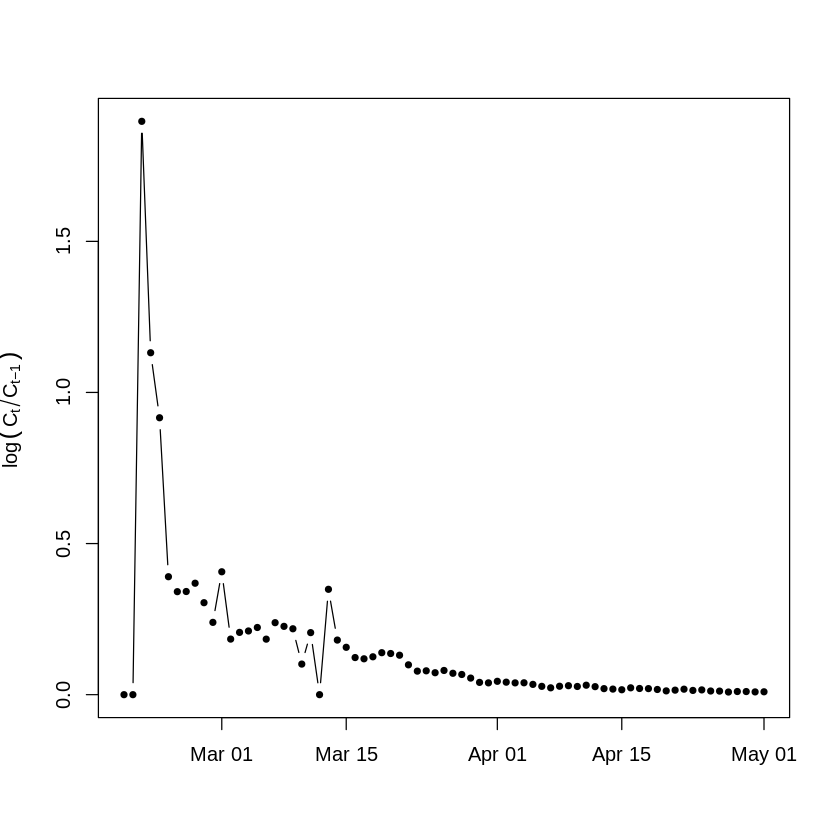

In [ ]:
plot(Italy_data$Dates,Italy_data$ln_rt,type="b",pch=20,ylab = expression(log(C[t]/C[t-1])),xlab="")

### Fit linear model

In [ ]:
lm_italy<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=Italy_data)
summary(lm_italy)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = Italy_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62269 -0.05094  0.00514  0.02979  1.32670 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.496e-01  8.938e-02   7.268 4.34e-10 ***
Time        -2.714e-02  8.586e-03  -3.161  0.00233 ** 
I(Time^2)    2.521e-04  9.317e-05   2.706  0.00858 ** 
lock_down    6.809e-02  1.297e-01   0.525  0.60134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2179 on 69 degrees of freedom
Multiple R-squared:  0.4159,	Adjusted R-squared:  0.3905 
F-statistic: 16.38 on 3 and 69 DF,  p-value: 3.866e-08


From the p-values we can conclude that Time and Time^2 has effect on response variable(log-ratios) but p-value corresponding to lockdown variable is much greater than 0.05 which means that lockdown doesn't have significant effect on response variable. From the R-square value we can also conclude that the fitting is not good.

### Normality test of Residuals

In [ ]:
shapiro.test(lm_italy$residuals)


	Shapiro-Wilk normality test

data:  lm_italy$residuals
W = 0.55618, p-value = 1.618e-13


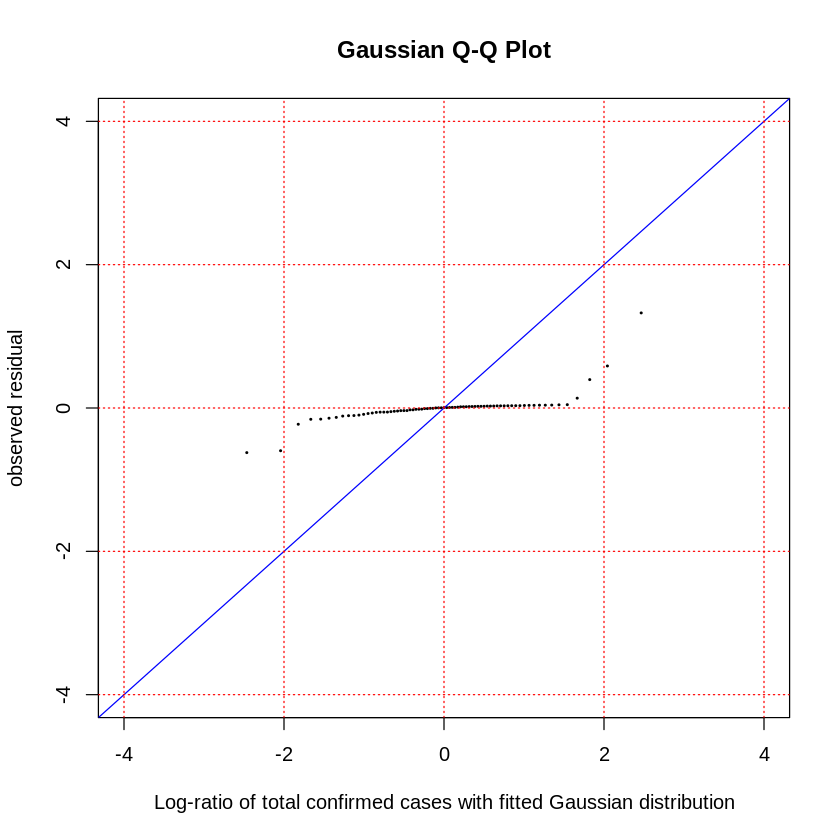

In [ ]:
Q_Q_plot_gaussian(lm_italy)

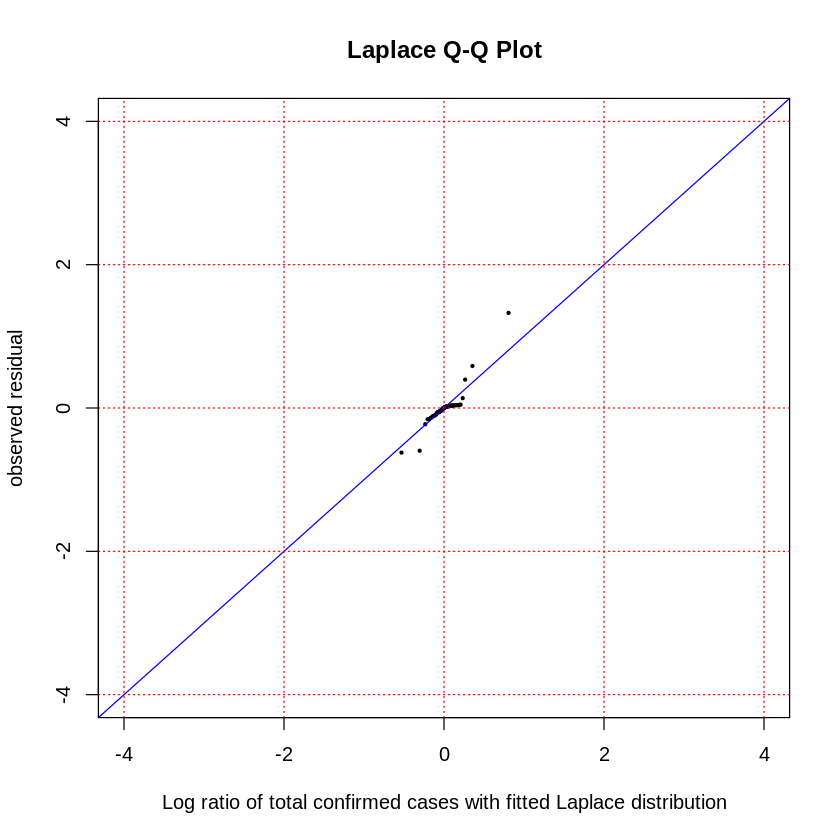

In [ ]:
Q_Q_plot_laplace(lm_italy)

From Shapiro-wilk test and looking at the Gaussian Q-Q plot, it is clear that the error doesn't follow normal distribution. From the Laplacian Q-Q plot we can say that errors follow laplace distribution.

## Response and Predictors

In [ ]:
out_it = return_variables(Italy_data)
y_it = unlist(out_it[1]); x1_it = unlist(out_it[2]); x2_it = unlist(out_it[3]); x3_it = unlist(out_it[4])
x_it = cbind(x1_it,x2_it,x3_it)

## Run Metroplis

In [ ]:
chain_it = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim= 60000
                       ,burnin=0, y_it,x_it)

posterior_summary(chain_it)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.4331,-5.4377,0.4288,0.0140,135.6414
mean,1.9877,-9.9947,0.5035,-4.6816,129.6939
sd,9.6131,11.0051,0.4882,20.5343,121.5322
2.5%,-5.0425,-29.5200,0.0001,-83.5432,0.0609
97.5%,32.7591,0.2338,1.2517,5.3815,328.6667


## Trace Plot

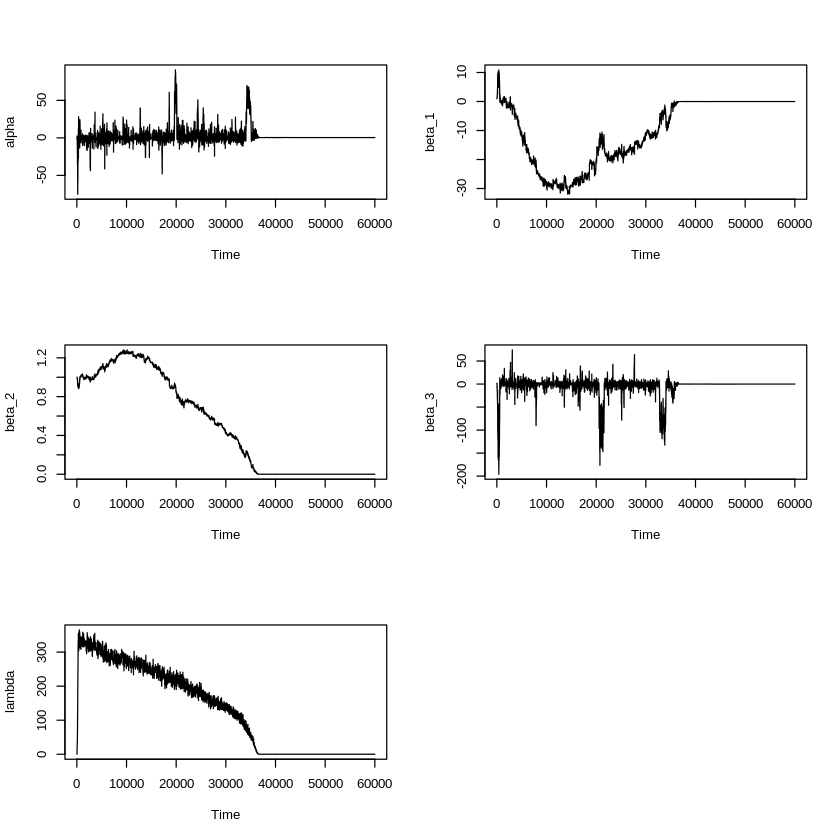

In [ ]:
trace_plot(as.data.frame(chain_it)[1:5])

The trace plot shows the sampled values of a parameter over time.This plot helps you to judge how quickly the MCMC procedure converges in distribution—that is, how quickly it forgets its starting values. In this case, it looks like there was a burn-in of about 35000 iterations, after which the MCMC sampler seems to mix well. So we now plot taking a burn-in of about 35000 iterations and conclude our result from the summary statistics of the posterior.

### Considering Burn-in Period

In [ ]:
chain_it = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim= 60000
                       ,burnin=38000, y_it,x_it)

## Posterior Summary
posterior_summary(chain_it)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.4331,-0.0141,1e-04,0.0140,0.0696
mean,0.4326,-0.0140,1e-04,0.0097,0.0724
sd,0.0263,0.0019,0e+00,0.0256,0.0077
2.5%,0.3657,-0.0196,1e-04,-0.0454,0.0609
97.5%,0.5196,-0.0102,2e-04,0.0724,0.0903


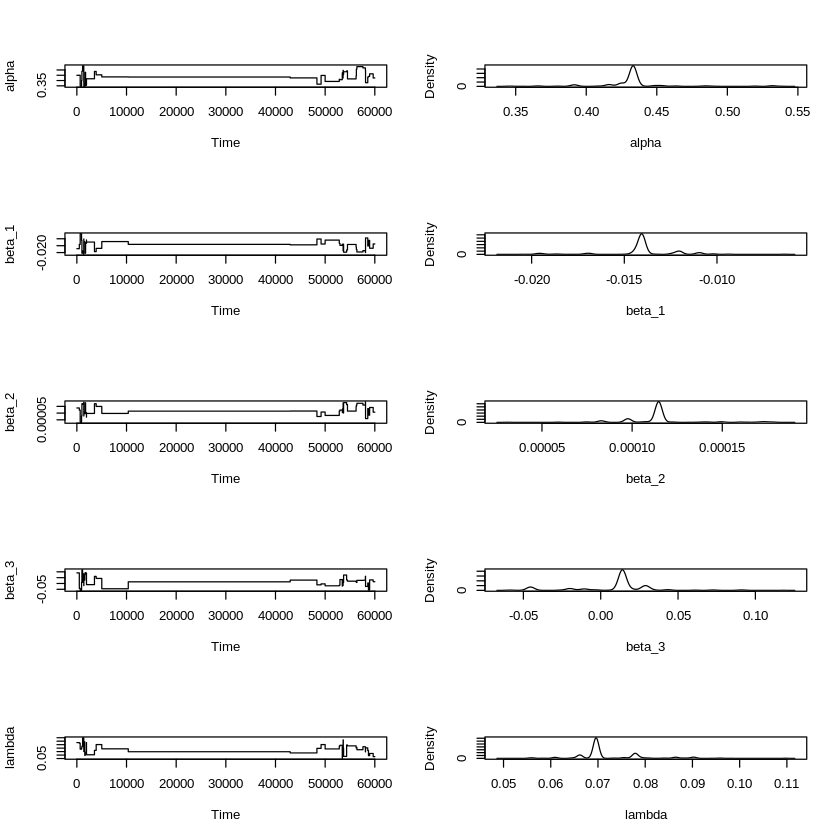

In [ ]:
## Trace plot and plot of the distributions
trace_plot(chain_it, density_plot=TRUE)

From the summary statistics of posterior of the parameters we can conclude whether a variable has a significant effect on the response variable or not.
Here we can take the mean of the parameters as our estimates and can have a regression line. Based on the 95% credible interval from the summary statistics,we can say that the x1, x2(Time, Time^2 ) have effect on response variable as the the symmetric posterior quantile based credible intervals for the co-efficients exclude zero. From the summary, looking at the values of the co-efficients it is clear that the effect of x's on y is not much. There is a mild effect of the predictors on response. But for lockdown the symmetric posterior quantile based credible interval includes zero and the interval ranges from -0.04 to 0.07. It may have a mild effect on response but based on these result we conclude that the effect of lockdown is not significant. 
 

### Analysis for Spain



In [ ]:
Spain_data = preprocessed_dataframe("Spain")

Spain_data<-subset(Spain_data,Dates>="2020-02-24") 
Spain_data<-subset(Spain_data,Dates<="2020-05-01") 
Spain_data$Time<-0:(nrow(Spain_data)-1)
Spain_data$lock_down<-0 
Spain_data$lock_down[Spain_data$Dates>="2020-03-13"]<-1 
Spain_data$ln_rt[2:nrow(Spain_data)]<-diff(log(Spain_data$Total_Confirmed_Cases))
Spain_data <- na.omit(Spain_data) 

In [ ]:
head(Spain_data,5) 

,Dates,Incidence,Total_Confirmed_Cases,Time,lock_down,ln_rt
,<date>,<int>,<int>,<int>,<dbl>,<dbl>
34,2020-02-25,4,6,1,0,1.0986123
35,2020-02-26,7,13,2,0,0.7731899
36,2020-02-27,2,15,3,0,0.1431008
37,2020-02-28,17,32,4,0,0.7576857
38,2020-02-29,13,45,5,0,0.3409266


### Visualize

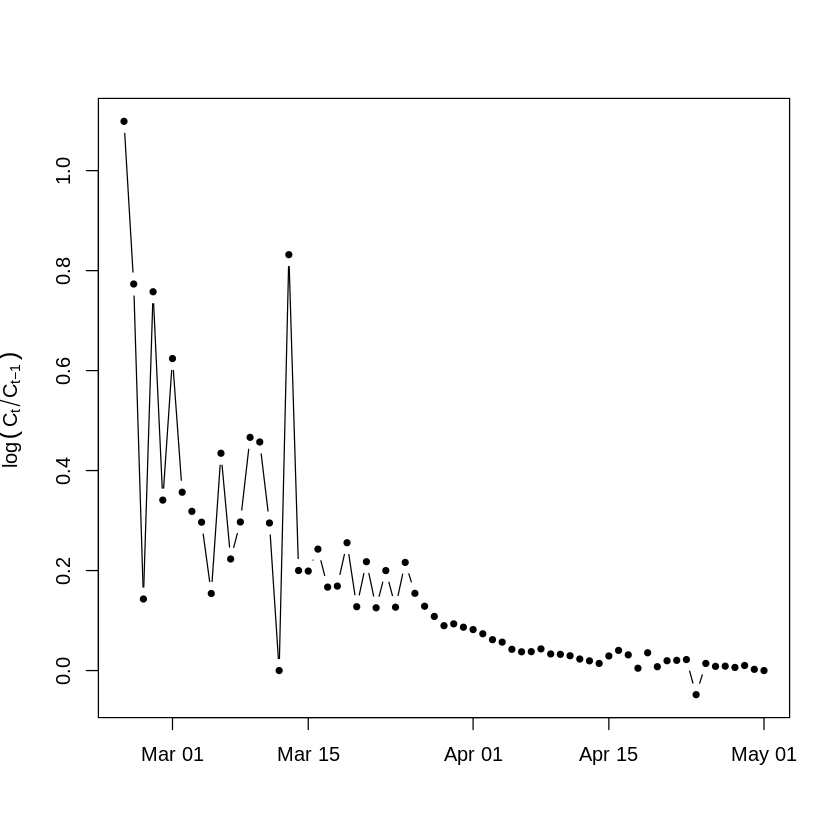

In [ ]:
plot(Spain_data$Dates,Spain_data$ln_rt,type="b",pch=20,ylab = expression(log(C[t]/C[t-1])),xlab="")

### Fit linear model

In [ ]:
lm_spain<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=Spain_data)
summary(lm_spain)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = Spain_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44413 -0.05410  0.01118  0.02669  0.45631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.866e-01  5.570e-02  12.326  < 2e-16 ***
Time        -3.409e-02  5.885e-03  -5.792 2.39e-07 ***
I(Time^2)    3.255e-04  6.971e-05   4.669 1.63e-05 ***
lock_down    1.971e-01  8.153e-02   2.418   0.0185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1305 on 63 degrees of freedom
Multiple R-squared:  0.6785,	Adjusted R-squared:  0.6632 
F-statistic: 44.31 on 3 and 63 DF,  p-value: 1.595e-15


From the p-values we can conclude that Time, Time^2 and lockdown all have effect on response variable(log-ratios) as the p-values corresponding to the variables are less than 0.05 . From the R-square value we can also conclude that the fitting is moderately good.

### Check Normality of residuals

In [ ]:
## Shapiro Wilk Test
shapiro.test(lm_spain$residuals)


	Shapiro-Wilk normality test

data:  lm_spain$residuals
W = 0.85246, p-value = 1.246e-06


### Q-Q plot

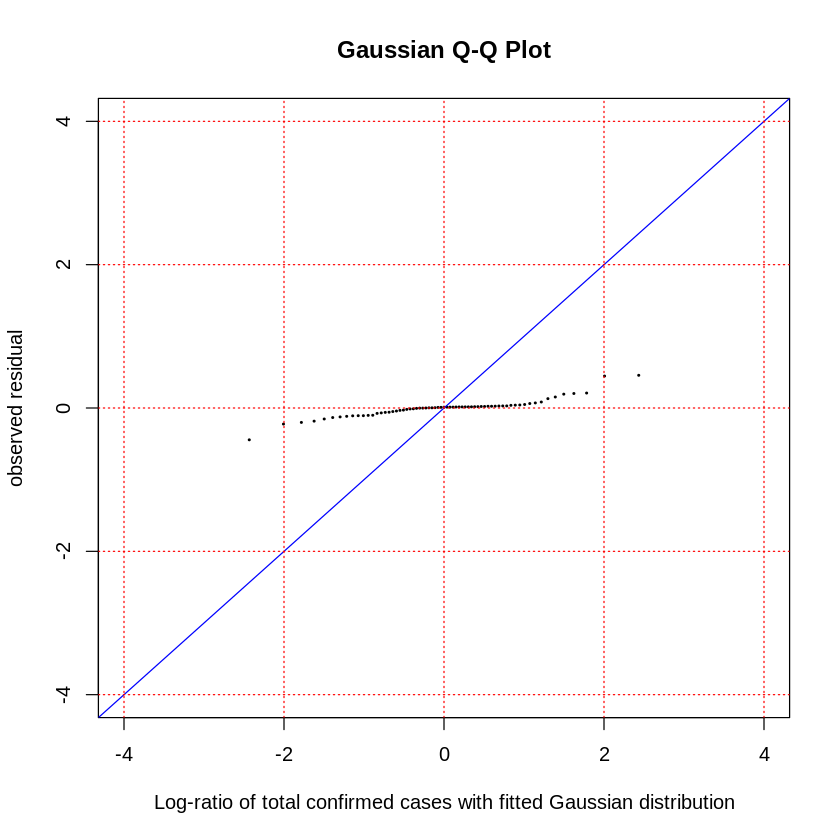

In [ ]:
Q_Q_plot_gaussian(lm_spain)

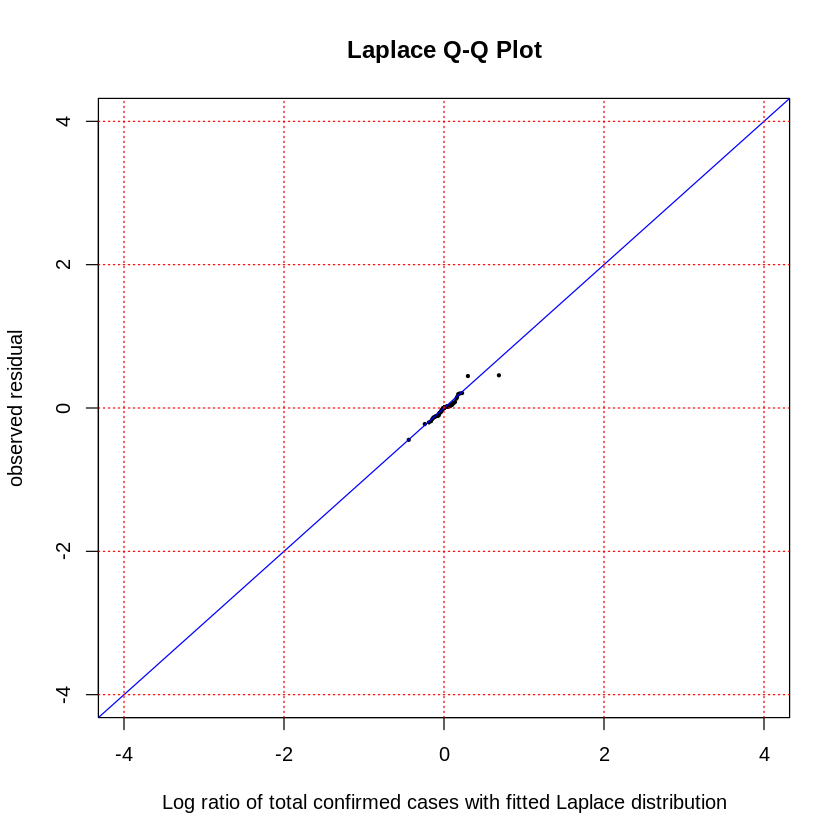

In [ ]:
Q_Q_plot_laplace(lm_spain)

From Shapiro-wilk test and looking at the Gaussian Q-Q plot, it is clear that the error doesn't follow normal distribution. From the Laplacian Q-Q plot we can say that errors follow laplace distribution.

### Response and Predictors

In [ ]:
out_sp = return_variables(Spain_data)
y_sp = unlist(out_sp[1]); x1_sp = unlist(out_sp[2]); x2_sp = unlist(out_sp[3]); x3_sp = unlist(out_sp[4])
x_sp = cbind(x1_sp,x2_sp,x3_sp)
# theta = run_gaussian(y,x1,x2,x3,sim_size = 2000, burn_in=0)
# posterior_summary(theta)

### Run Metropolis-Hasting

In [ ]:
chain_sp = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim= 60000
                       ,burnin=0, y_sp,x_sp)

posterior_summary(chain_sp)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.5189,-3.4930,0.3902,-0.0022,109.0130
mean,11.7747,-10.3921,0.5050,-4.1373,108.7080
sd,40.6489,12.7089,0.5076,33.7639,106.0592
2.5%,-3.7331,-34.8190,0.0001,-105.0207,0.0577
97.5%,173.3083,0.7265,1.3007,10.5657,284.7605


### Trace Plot

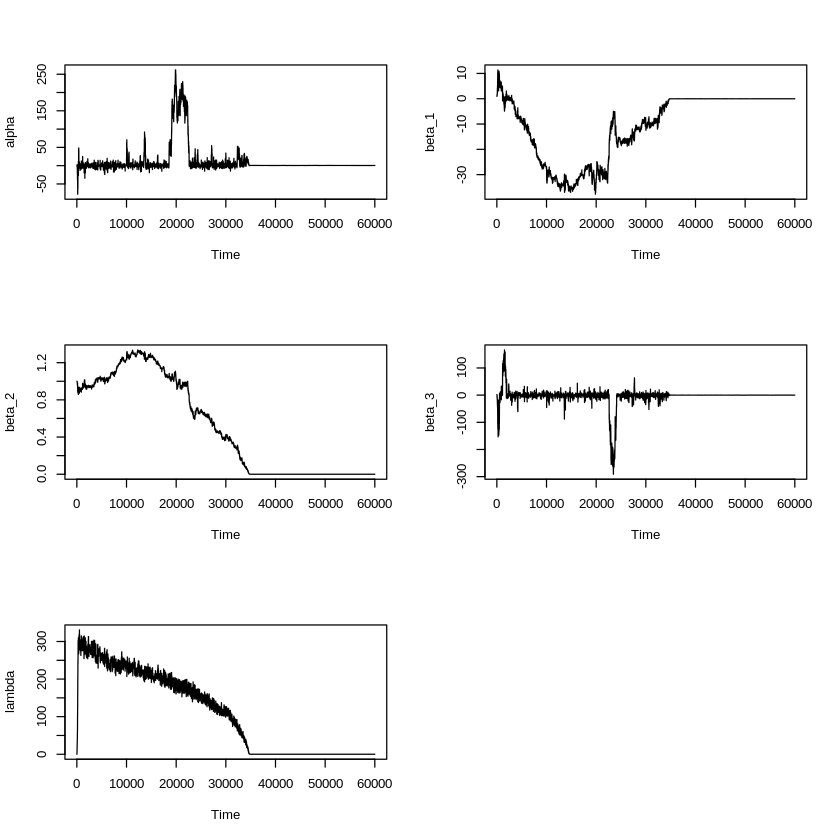

In [ ]:
trace_plot(as.data.frame(chain_sp)[1:5])

The trace plot shows the sampled values of a parameter over time.This plot helps you to judge how quickly the MCMC procedure converges in distribution—that is, how quickly it forgets its starting values. In this case, it looks like there was a burn-in of about 36000 iterations, after which the MCMC sampler seems to mix well. So we now plot taking a burn-in of about 36000 iterations and conclude our result from the summary statistics of the posterior.

### Considering Burn-in Period

In [ ]:
chain_sp = run_metropolis(startvalue=c(0,1,1,1,0.1)
                       ,N.sim= 60000
                       ,burnin=36000, y_sp,x_sp)

posterior_summary(chain_sp)

,alpha,beta_1,beta_2,beta_3,lambda
median,0.4921,-0.0158,1e-04,0.0065,0.0711
mean,0.5030,-0.0168,1e-04,-0.0005,0.0702
sd,0.0508,0.0033,0e+00,0.0519,0.0087
2.5%,0.4323,-0.0261,1e-04,-0.1232,0.0556
97.5%,0.6417,-0.0116,2e-04,0.1091,0.0957


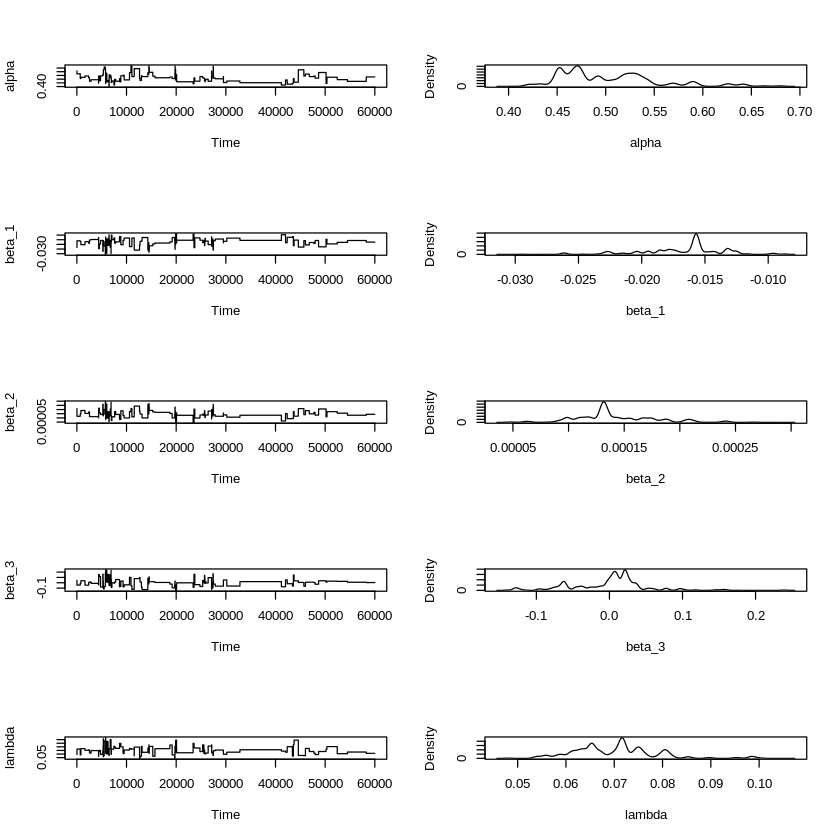

In [ ]:
## Trace plot and plot of the distributions
trace_plot(chain_sp, density_plot=TRUE)

From the summary statistics of posterior of the parameters we can conclude whether a variable has a significant effect on the response variable or not.
Here we can take the mean of the parameters as our estimates and can have a regression line. Based on the 95% credible interval from the summary statistics,we can say that the x1, x2(Time, Time^2 ) have effect on response variable as the the symmetric posterior quantile based credible intervals for the co-efficients exclude zero. From the summary, looking at the values of the co-efficients it is clear that the effect of x's on y is not much. There is a mild effect of the predictors on response. But for lockdown the symmetric posterior quantile based credible interval includes zero and the interval ranges from -0.12 to 0.1. It may have a mild effect on response but based on these result we conclude that the effect of lockdown is not significant. 

    Check the Documentation for more explanation.